In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function for running and plotting simulation results

This is the function that helps to run the simulation and graph the results.

This function references part of the code shown in SC4052 Cloud Computing Tutorial 1 Solution.

In [ ]:
def aimd_plot(iterations, capacity, initial_x1, initial_x2, increaseFunc1, increaseFunc2, decreaseFunc1, decreaseFunc2, plotTitle, alpha1, alpha2, beta1, beta2, plot2xy=None, plot3xy=None):
    '''
    Plot a graph for AIMD Algorithm

    Args:
        iterations : Number of iterations to simulate
        capacity : Maximum capacity of the network
        initial_x1 : Initial allocation value for x1
        initial_x2 : Initial allocation value for x2
        increaseFunc1 : Function that returns the increased value of x1
        increaseFunc2 : Function that returns the increased value of x2
        decreaseFunc1 : Function that returns the decreased value of x1
        decreaseFunc2 : Function that returns the decreased value of x2
        plotTitle : Title of the graph
        alpha1 : Addictive Increase factor for annotation of x1
        alpha2 : Addictive Increase factor for annotation of x2
        beta1 : Multiplicative Decrease factor for annotation of x1
        beta2 : Multiplicative Decrease factor for annotation of x2
        plot2xy : Tuple to specify where to place the annotation for plot2 (x1)
        plot3xy : Tuple to specify where to place the annotation for plot3 (x2)
    '''
    x1 = initial_x1
    x2 = initial_x2
    x1_values = np.zeros(iterations)
    x2_values = np.zeros(iterations)
    latest_x1 = 0
    latest_x2 = 0

    fairness_iteration = 0
    decreased_iteration = np.empty(shape=(1,0))

    for i in range(iterations):
        if (x1 + x2 <= capacity):
            # Additive increase phase
            x1 = increaseFunc1(x1)
            x2 = increaseFunc2(x2)
        else:
            # Multiplicative decrease phase
            # Simulate network condition (for example, congestion)
            latest_x1 = x1
            latest_x2 = x2
            decreased_iteration = np.append(decreased_iteration, i)
            # checks if values are within 5% of the fair value
            # to estimate if it has already converged
            if fairness_iteration == 0 and capacity/2 * 0.95 < latest_x2 < capacity/2 * 1.05:
                fairness_iteration = i

            x1 = decreaseFunc1(x1)
            x2 = decreaseFunc2(x2)

        # Store values in arrays
        x1_values[i] = x1
        x2_values[i] = x2

    # Display the final values
    print("Total iterations:", iterations)
    print("Close to fair value at", fairness_iteration)
    print("Latest x1 and x2 before congestion is detected:", latest_x1, latest_x2)
    print("Iterations where congestion occurs", decreased_iteration)

    # Setting the graphs sizes and layout
    fig = plt.figure(figsize=(7, 6.5), layout="constrained")
    plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=4)
    plot2 = plt.subplot2grid((8, 2), (4, 0), colspan=2, rowspan=2)
    plot3 = plt.subplot2grid((8, 2), (6, 0), colspan=2, rowspan=2)


    # Plot the fairness line where x1=x2
    linear_x = np.linspace(0, capacity, capacity)
    plot1.plot(linear_x, linear_x, label='Fairness Line', linestyle='dashed')


    # Plot the efficiency line where x1 + x2 = capacity
    cap_y = capacity - linear_x
    plot1.plot(linear_x, cap_y, label='Efficiency Line', linestyle='dashed')


    # Plot the results
    plot1.plot(x1_values, x2_values, marker='.', color='black')
    # Plot the last peak value on top of results
    plot1.plot(latest_x1, latest_x2, marker='o', label=f'Final peak value ({latest_x1:.2f}, {latest_x2:.2f})')
    # Set attributes of the results graph
    plot1.set_xlim(0, capacity*1.1)
    plot1.set_ylim(0, capacity)
    plot1.legend(loc='upper left')
    plot1.set_xlabel("User 1's Allocation $x_{1}$")
    plot1.set_ylabel("User 2's Allocation $x_{2}$")
    plot1.set_title(plotTitle)
    plot1.annotate(f'Iterations: {iterations}\nCapacity: {network_capacity}\nInitial $x_{1}$: {initial_x1}\nInitial $x_{2}$: {initial_x2}\n$\\alpha_{1}$: {alpha1}\n$\\alpha_{2}$: {alpha2}\n$\\beta_{1}$: {beta1}\n$\\beta_{2}$: {beta2}',
                   xy=(0.9*capacity, 0.12*capacity))


    # Estimate steady window size if there is at least 4 drops,
    # otherwise take the average over entire simulation.
    if len(decreased_iteration) > 4:
        # I will be taking the average of the last 3 as
        # it is likely to have converged by now from my observations.

        # Get the window where the last 3 drops happened
        window = decreased_iteration[-1] - decreased_iteration[-4]
        # sum of values between the last 3 drops
        steady_x1 = sum(x1_values[int(decreased_iteration[-4]) : int(decreased_iteration[-1])])
        # estimate the steady rate of user transmission
        average_x1 = steady_x1/window
    else:
        print("average used for x1 instead")
        average_x1 = sum(x1_values)/iterations


    # Plot the values of x1
    rtt_values = np.linspace(0, iterations, iterations)
    plot2.plot(rtt_values, x1_values, marker=".", color='black', linewidth=1)
    plot2.set_xlabel('Number of Transmissions')
    plot2.set_ylabel('Congestion Window Size ')
    plot2.set_title('Congestion Window for $x_{1}$')
    # Where to place the annotation
    if plot2xy is None: plot2xy = (0.7*iterations, latest_x1/2)
    plot2.annotate(f'Steady rate $x_{1}$: {average_x1:.2f}', xy=plot2xy)


    # this calculation is the same idea as x1 above
    if len(decreased_iteration) > 4:
        window = decreased_iteration[-1] - decreased_iteration[-4]
        steady_x2 = sum(x2_values[int(decreased_iteration[-4]) : int(decreased_iteration[-1])])
        average_x2 = steady_x2/window
    else:
        print("average used for x2 instead")
        average_x2 = sum(x2_values)/iterations


    # Plot the values of x2
    plot3.plot(rtt_values, x2_values, marker=".", color='black', linewidth=1)
    plot3.set_xlabel('Number of Transmissions')
    plot3.set_ylabel('Congestion Window Size ')
    plot3.set_title('Congestion Window for $x_{2}$')
    # Where to place the annotation
    if plot3xy is None: plot3xy = (0.7*iterations, latest_x2/2)
    plot3.annotate(f'Steady rate $x_{2}$: {average_x2:.2f}', xy=plot3xy)

    plt.show()

# Experiments on algorithms for TCP

## 1. Additive-Increase and Multiplicative-Decrease (AIMD) algorithm

Total iterations: 200
Close to fair value at 96
Latest x1 and x2 before congestion is detected: 49.84375 50.1875
Iterations where congestion occurs [ 44.  70.  96. 122. 148. 174.]


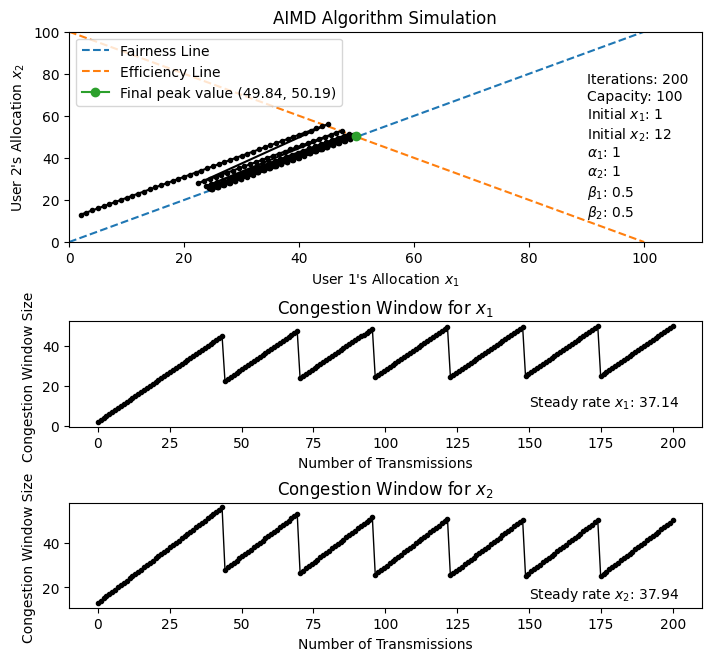

In [ ]:
ITERATESMAX = 200 # Number of iterations
network_capacity = 100

initial_x1 = 1
initial_x2 = 12

# Additive increase phase
def AI(initial_x):
    return initial_x + 1

# Multiplicative decrease phase
def MD(initial_x):
    return initial_x * 0.5


# values below for annotating the graph
alpha1 = alpha2 = 1
beta1 = beta2 = 0.5

aimd_plot(ITERATESMAX, network_capacity, initial_x1, initial_x2, AI, AI, MD, MD, 'AIMD Algorithm Simulation', alpha1, alpha2, beta1, beta2, (150,10), (150,15))

### Additional Experiment: AIMD if users use different values

The simulation below shows that AIMD still converges at the efficiency line but not fairness if the variables are not equal. However, this bias may be useful if a data centre desires to prioritise one user traffic over another such as users who paid for higher bandwidth.

Total iterations: 200
Close to fair value at 0
Latest x1 and x2 before congestion is detected: 67.986328125 34.015625
Iterations where congestion occurs [ 30.  48.  66.  84. 102. 120. 138. 156. 174. 192.]


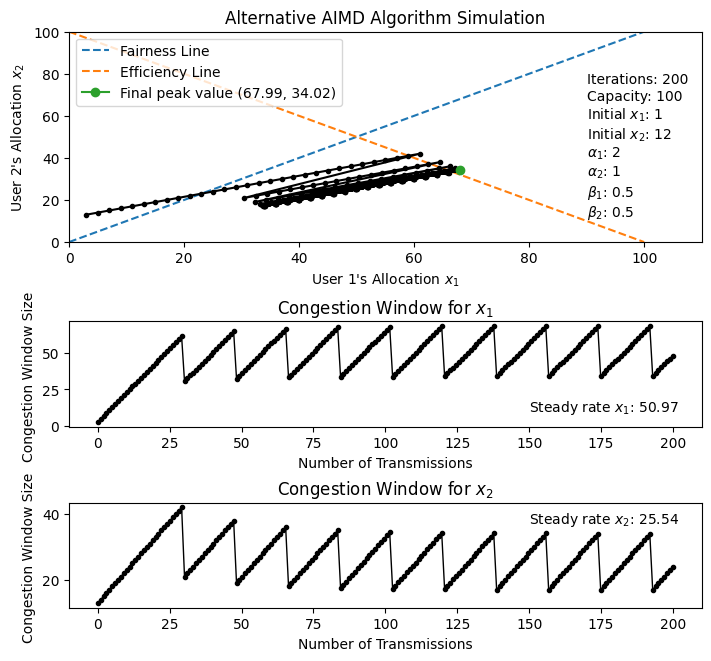

In [ ]:
ITERATESMAX = 200 # Number of iterations
network_capacity = 100

initial_x1 = 1
initial_x2 = 12

# Additive increase phase
def AI1(initial_x):
    return initial_x + 2

def AI2(initial_x):
    return initial_x + 1

# Multiplicative decrease phase
def MD(initial_x):
    return initial_x * 0.5


# values below for annotating the graph
alpha1 = 2
alpha2 = 1
beta1 = beta2 = 0.5

aimd_plot(ITERATESMAX, network_capacity, initial_x1, initial_x2, AI1, AI2, MD, MD, 'Alternative AIMD Algorithm Simulation', alpha1, alpha2, beta1, beta2, (150,10), (150,37))

## 2. Multiplicative-Increase and Exponential-Decrease (MIED) algorithm

Total iterations: 200
Close to fair value at 189
Latest x1 and x2 before congestion is detected: 52.43129349264883 56.61619476963097
Iterations where congestion occurs [ 22.  27.  33.  38.  44.  49.  55.  60.  65.  70.  76.  81.  86.  91.
  97. 102. 107. 112. 117. 122. 128. 133. 138. 143. 148. 153. 159. 164.
 169. 174. 179. 184. 189. 195.]


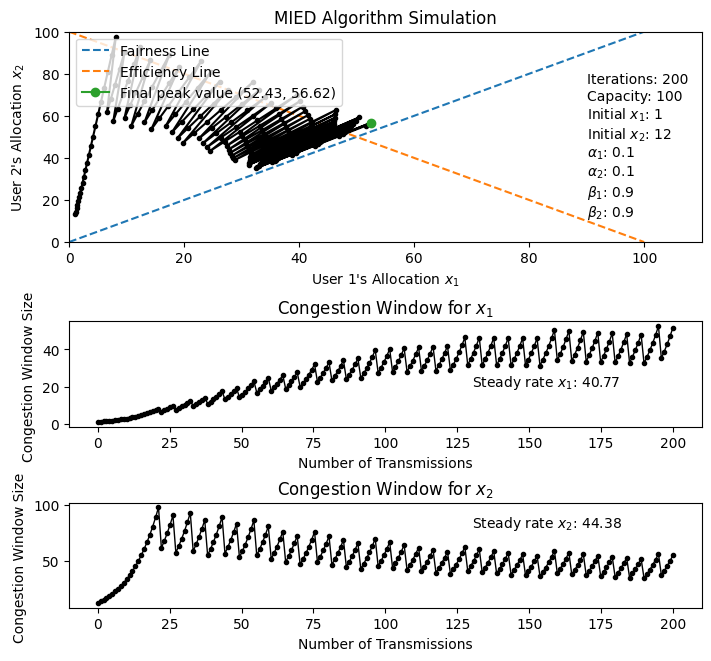

In [ ]:
ITERATESMAX = 200 # Number of iterations
network_capacity = 100

initial_x1 = 1
initial_x2 = 12

# Multiplicative increase phase
def MI(initial_x):
    return initial_x + (0.1 * initial_x)

# Multiplicative decrease phase
def MD(initial_x):
    return np.power(initial_x, 0.9)


# values below for annotating the graph
alpha1 = alpha2 = 0.1
beta1 = beta2 = 0.9

aimd_plot(ITERATESMAX, network_capacity, initial_x1, initial_x2, MI, MI, MD, MD, 'MIED Algorithm Simulation', alpha1, alpha2, beta1, beta2, (130, 20), (130, 80))


### Further experimentation on MIED

The simulation below shows that MIED converges on the fairness and efficiency line at higher iterations. Another observation is that both users has the same congestion window.

Total iterations: 1000
Close to fair value at 189
Latest x1 and x2 before congestion is detected: 51.906413767111474 51.9064140570897
Iterations where congestion occurs [ 22.  27.  33.  38.  44.  49.  55.  60.  65.  70.  76.  81.  86.  91.
  97. 102. 107. 112. 117. 122. 128. 133. 138. 143. 148. 153. 159. 164.
 169. 174. 179. 184. 189. 195. 200. 205. 210. 215. 220. 226. 231. 236.
 241. 246. 251. 256. 262. 267. 272. 277. 282. 287. 292. 298. 303. 308.
 313. 318. 323. 329. 334. 339. 344. 349. 354. 359. 365. 370. 375. 380.
 385. 390. 395. 401. 406. 411. 416. 421. 426. 432. 437. 442. 447. 452.
 457. 462. 468. 473. 478. 483. 488. 493. 498. 504. 509. 514. 519. 524.
 529. 535. 540. 545. 550. 555. 560. 565. 571. 576. 581. 586. 591. 596.
 601. 607. 612. 617. 622. 627. 632. 638. 643. 648. 653. 658. 663. 668.
 674. 679. 684. 689. 694. 699. 704. 710. 715. 720. 725. 730. 735. 741.
 746. 751. 756. 761. 766. 771. 777. 782. 787. 792. 797. 802. 807. 813.
 818. 823. 828. 833. 838. 844. 849. 854. 859. 864.

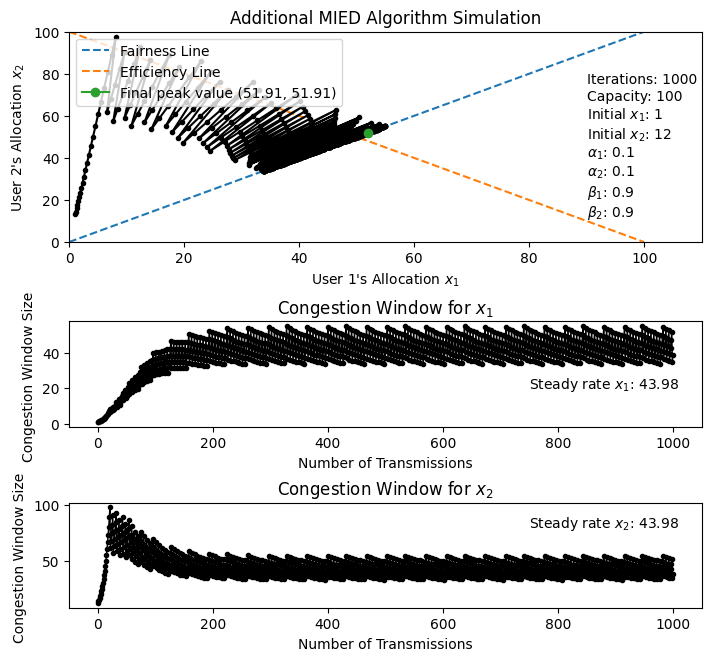

In [ ]:
ITERATESMAX = 1000 # Number of iterations
network_capacity = 100

initial_x1 = 1
initial_x2 = 12

# Multiplicative increase phase
def MI(initial_x):
    return initial_x + (0.1 * initial_x)

# Multiplicative decrease phase
def MD(initial_x):
    return np.power(initial_x, 0.9)


# values below for annotating the graph
alpha1 = alpha2 = 0.1
beta1 = beta2 = 0.9

aimd_plot(ITERATESMAX, network_capacity, initial_x1, initial_x2, MI, MI, MD, MD, 'Additional MIED Algorithm Simulation', alpha1, alpha2, beta1, beta2, (750, 20), (750, 80))


# Discussion of experiment results

## What if a user is already near the capacity and another user joins?

The results below show that AIMD tends towards the fairness line much faster than MIED.

### Simulation of AIMD in this scenario

Total iterations: 300
Close to fair value at 189
Latest x1 and x2 before congestion is detected: 500.2890625 507.703125
Iterations where congestion occurs [  4.  41.  78. 115. 152. 189. 226. 263.]


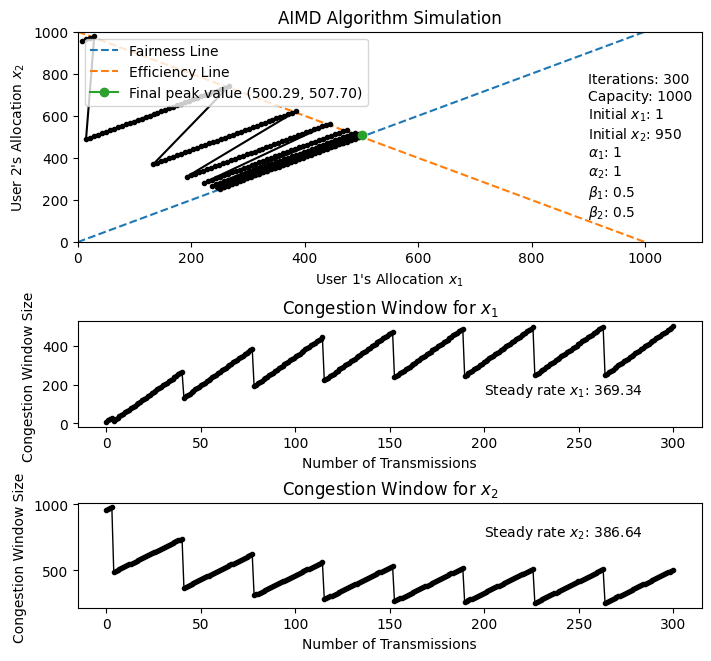

In [ ]:
ITERATESMAX = 300 # Number of iterations
network_capacity = 1000

initial_x1 = 1
initial_x2 = 950

# Additive increase phase
def AI(initial_x):
    return initial_x + 7

# Multiplicative decrease phase
def MD(initial_x):
    return initial_x * 0.5


# values below for annotating the graph
alpha1 = alpha2 = 1
beta1 = beta2 = 0.5

aimd_plot(ITERATESMAX, network_capacity, initial_x1, initial_x2, AI, AI, MD, MD, 'AIMD Algorithm Simulation', alpha1, alpha2, beta1, beta2, (200, 150), (200, 755))

### Simulation of MIED in this scenario

Total iterations: 500
Close to fair value at 335
Latest x1 and x2 before congestion is detected: 501.11289014493525 505.1802521639929
Iterations where congestion occurs [  1.   9.  18.  26.  34.  42.  50.  59.  67.  75.  83.  91.  99. 107.
 115. 122. 130. 138. 146. 153. 161. 169. 176. 184. 191. 199. 207. 214.
 222. 229. 237. 245. 252. 260. 267. 275. 282. 290. 298. 305. 313. 320.
 328. 335. 343. 351. 358. 366. 373. 381. 388. 396. 404. 411. 419. 426.
 434. 441. 449. 457. 464. 472. 479. 487. 494.]


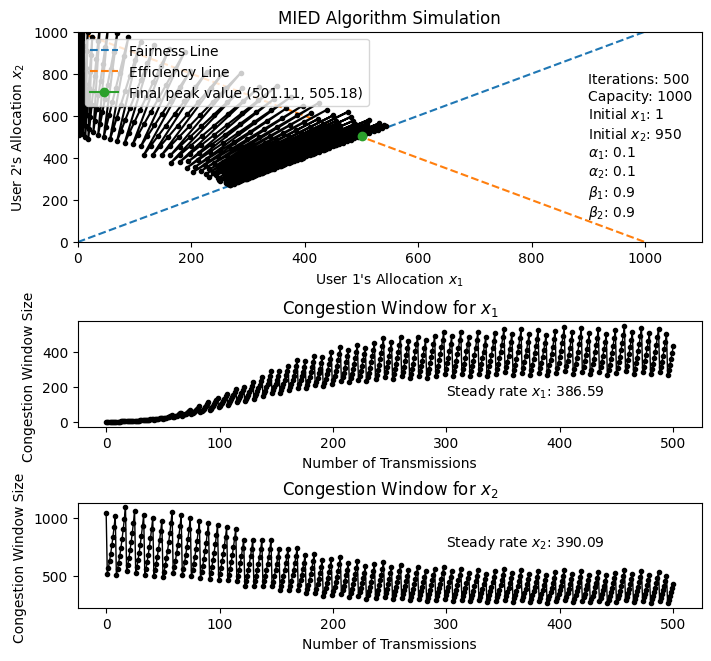

In [ ]:
ITERATESMAX = 500 # Number of iterations
network_capacity = 1000

initial_x1 = 1
initial_x2 = 950

# Multiplicative increase phase
def MI(initial_x):
    return initial_x + (0.1 * initial_x)

# Multiplicative decrease phase
def MD(initial_x):
    return np.power(initial_x, 0.9)


# values below for annotating the graph
alpha1 = alpha2 = 0.1
beta1 = beta2 = 0.9

aimd_plot(ITERATESMAX, network_capacity, initial_x1, initial_x2, MI, MI, MD, MD, 'MIED Algorithm Simulation', alpha1, alpha2, beta1, beta2, (300, 150), (300, 755))


# Convergence of AIMD

In [ ]:
A = np.matrix('0.5 0 0; 0 0.5 0; 0 0 0.5') + 1/3 * np.matrix('1; 1; 1') @ np.matrix('0.5 0.5 0.5')
print("Matrix A:\n",A)

W = np.matrix('1; 5; 12') # inital values of users

for i in range(100):
    W = A @ W
    # if equals (up to 3 dp)
    rounded_w = np.round(W, 3)
    if np.all(rounded_w == rounded_w[0, 0]):
        print('Converged at iteration',i)
        break

print("Final W\n",W)

Matrix A:
 [[0.66666667 0.16666667 0.16666667]
 [0.16666667 0.66666667 0.16666667]
 [0.16666667 0.16666667 0.66666667]]
Converged at iteration 13
Final W
 [[5.99969482]
 [5.99993896]
 [6.00036621]]


In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Find the index of the dominant eigenvalue
perron_index = np.argmax(eigenvalues)

# Perron-Frobenius eigenvector (corresponding to the dominant eigenvalue)
perron_vector = eigenvectors[:, perron_index]

# Normalize so that the eigenvector sums to 1
perron_vector = perron_vector / np.sum(perron_vector)

print("Perron-Frobenius Eigenvalue:", eigenvalues[perron_index])
print("Perron-Frobenius Eigenvector:\n", perron_vector)

Perron-Frobenius Eigenvalue: 1.0
Perron-Frobenius Eigenvector:
 [[0.33333333]
 [0.33333333]
 [0.33333333]]
